In [2]:
#Importing the necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime, date
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import plot
from sklearn.ensemble import * #AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
#from xgboost import XGBClassifier#XGBClassifier

#Initialisation phase (getting informations on our data)

In [3]:
# We read the Airbnb data
test=pd.read_csv('test_users.csv') #Test Data
train=pd.read_csv('train_users_2.csv') #Training data

In [4]:
#Preview of the training data
train.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [5]:
#Preview of the test data
test.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari
5,szx28ujmhf,2014-07-01,20140701000336,NaN,FEMALE,28.0,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Chrome
6,guenkfjcbq,2014-07-01,20140701000514,NaN,MALE,48.0,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-
7,tkpq0mlugk,2014-07-01,20140701000649,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
8,3xtgd5p9dn,2014-07-01,20140701000837,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
9,md9aj22l5a,2014-07-01,20140701002245,NaN,-unknown-,NaN,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Firefox


In [6]:
#We check the dimensions of our datasets
print('traning data shape: ',train.shape)
print('testing data shape: ',test.shape)

traning data shape:  (213451, 16)
testing data shape:  (62096, 15)


In [7]:
print('training data informations',train.info(),'\n')
print('testing data informations',test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

#Data Cleaning Phase


In [8]:
#Sum of missing values per columns and per dataset
print('missing values in training data\n',train.isna().sum(),'\n')
print('missing values in testing data\n',test.isna().sum())

missing values in training data
 id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64 

missing values in testing data
 id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         62096
gender                         0
age                        28876
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affilia

In [9]:
#List unique value counts for specified categorical columns in our data to understand the distribution of each category

colonnes = [ 'gender',
 'signup_method',
 'signup_flow',
 'language',
 'affiliate_channel',
 'affiliate_provider',
 'first_affiliate_tracked',
 'signup_app',
 'first_device_type',
 'first_browser']

print('informations content columns training data\n')
for col in colonnes:
    print(train[col].value_counts())
print('\n')
print('informations content columns testing data\n')
for col in colonnes:
    print(test[col].value_counts())

informations content columns training data

gender
-unknown-    95688
FEMALE       63041
MALE         54440
OTHER          282
Name: count, dtype: int64
signup_method
basic       152897
facebook     60008
google         546
Name: count, dtype: int64
signup_flow
0     164739
25     14659
12      9329
3       8822
2       6881
24      4328
23      2835
1       1047
6        301
8        240
21       196
5         36
20        14
16        11
15        10
10         2
4          1
Name: count, dtype: int64
language
en    206314
zh      1632
fr      1172
es       915
ko       747
de       732
it       514
ru       389
pt       240
ja       225
sv       122
nl        97
tr        64
da        58
pl        54
cs        32
no        30
el        24
th        24
id        22
hu        18
fi        14
ca         5
is         5
hr         2
Name: count, dtype: int64
affiliate_channel
direct           137727
sem-brand         26045
sem-non-brand     18844
other              8961
seo              

In [ ]:
#train['language']=train['language'].replace('-unknown-', np.nan)
#train['first_browser']=train['first_browser'].replace('-unknown-', np.nan)
#test['language']=test['language'].replace('-unknown-', np.nan)
#test['first_browser']=test['first_browser'].replace('-unknown-', np.nan)

In [10]:
# We count ages in 'train' outside the range 18-100
# Since a user under 18 years old can't use Airbnb and it seems illogical for users over 100 years old to also use the platform

L=train['age']
c=0
for i in L:
    if ((i>100)|(i<18)):
        c=c+1
print(c)

2503


In [11]:
L=test['age']
c=0
for i in L:
    if ((i>100)|(i<18)):
        c=c+1
print(c)

375


In [12]:
#We omit the users outside of the 18-100 years old range by replacing their values to null values


L=train['age']
c=0
for i in L:
    if ((i>100)|(i<18)):
        train['age']=train['age'].replace(i, np.nan)

In [13]:
L=test['age']
c=0
for i in L:
    if ((i>100)|(i<18)):
        test['age']=test['age'].replace(i, np.nan)

In [14]:
#Age statistics
train.age.describe()

,age
count,122958.000000
mean,36.575619
std,11.681366
min,18.000000
25%,28.000000
50%,34.000000
75%,42.000000
max,100.000000


In [15]:
test.age.describe()

,age
count,32845.000000
mean,34.182798
std,11.358605
min,18.000000
25%,26.000000
50%,31.000000
75%,39.000000
max,100.000000


In [16]:
#We print the updated null count for the age column
print('missing values age in taining data',train['age'].isna().sum())
print('missing values age in testing data',test['age'].isna().sum())

missing values age in taining data 90493
missing values age in testing data 29251


In [17]:
#Drop the null values for the firs_affiliate_tracked column
train=train.dropna(subset=['first_affiliate_tracked'])
test=test.dropna(subset=['first_affiliate_tracked'])

In [18]:
#We convert the date objects to datetime type
train['date_account_created']=pd.to_datetime(train['date_account_created'])
train['timestamp_first_active']=pd.to_datetime(train['timestamp_first_active'],format='%Y%m%d%H%M%S')
test['date_account_created']=pd.to_datetime(test['date_account_created'])
test['timestamp_first_active']=pd.to_datetime(test['timestamp_first_active'],format='%Y%m%d%H%M%S')

In [19]:
#Converts the categorical features into the category data type
categorical_features = [
    'affiliate_channel',
    'affiliate_provider',
    'country_destination',
    'first_affiliate_tracked',
    'first_browser',
    'first_device_type',
    'gender',
    'language',
    'signup_app',
    'signup_method'
]

for categorical_feature in categorical_features:
    train[categorical_feature] = train[categorical_feature].astype('category')

for categorical_feature in categorical_features:
    if (categorical_feature !='country_destination'):
        test[categorical_feature] = test[categorical_feature].astype('category')

In [20]:
train=train.drop('id',axis=1)
test=test.drop('id',axis=1)

In [21]:
train=train.drop('date_first_booking',axis=1)
test=test.drop('date_first_booking',axis=1)

In [22]:
print('training data columns:\n',train.columns,'\n')
print('testing data columns:\n',test.columns)

training data columns:
 Index(['date_account_created', 'timestamp_first_active', 'gender', 'age',
       'signup_method', 'signup_flow', 'language', 'affiliate_channel',
       'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
       'first_device_type', 'first_browser', 'country_destination'],
      dtype='object') 

testing data columns:
 Index(['date_account_created', 'timestamp_first_active', 'gender', 'age',
       'signup_method', 'signup_flow', 'language', 'affiliate_channel',
       'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
       'first_device_type', 'first_browser'],
      dtype='object')


In [23]:
print('training data informations',train.info(),'\n')
print('testing data informations',test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 207386 entries, 0 to 213450
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   date_account_created     207386 non-null  datetime64[ns]
 1   timestamp_first_active   207386 non-null  datetime64[ns]
 2   gender                   207386 non-null  category      
 3   age                      120998 non-null  float64       
 4   signup_method            207386 non-null  category      
 5   signup_flow              207386 non-null  int64         
 6   language                 207386 non-null  category      
 7   affiliate_channel        207386 non-null  category      
 8   affiliate_provider       207386 non-null  category      
 9   first_affiliate_tracked  207386 non-null  category      
 10  signup_app               207386 non-null  category      
 11  first_device_type        207386 non-null  category      
 12  first_browser        

In [24]:
#We use Label Encoding for the categorical features
encode=LabelEncoder()

signup_method_enc=train.signup_method
train.signup_method=encode.fit_transform(signup_method_enc)

affiliate_channel_enc=train.affiliate_channel
train.affiliate_channel=encode.fit_transform(affiliate_channel_enc)

affiliate_provider_enc=train.affiliate_provider
train.affiliate_provider=encode.fit_transform(affiliate_provider_enc)

signup_app_enc=train.signup_app
train.signup_app=encode.fit_transform(signup_app_enc)

first_device_type_enc=train.first_device_type
train.first_device_type=encode.fit_transform(first_device_type_enc)

first_browser_enc=train.first_browser
train.first_browser=encode.fit_transform(first_browser_enc)

gender_enc=train.gender
train.gender=encode.fit_transform(gender_enc)


first_affiliate_tracked_enc=train.first_affiliate_tracked
train.first_affiliate_tracked=encode.fit_transform(first_affiliate_tracked_enc)

language_enc=train.language
train.language=encode.fit_transform(language_enc)

country_destination_enc=train.country_destination
train.country_destination=encode.fit_transform(country_destination_enc)

In [25]:
colonnes = [ 'gender',
            'signup_method',
            'signup_flow',
            'language',
            'affiliate_channel',
            'affiliate_provider',
            'first_affiliate_tracked',
            'signup_app',
            'first_device_type',
            'first_browser',
            'country_destination']

print('informations content columns training data\n')
for col in colonnes:
    print(train[col].value_counts())

informations content columns training data

gender
0    91783
1    61978
2    53347
3      278
Name: count, dtype: int64
signup_method
0    148297
1     58543
2       546
Name: count, dtype: int64
signup_flow
0     163180
25     13739
12      8910
3       7604
2       5571
24      3989
23      2801
1        848
6        244
8        237
21       196
5         32
20        14
16         9
15         9
10         2
4          1
Name: count, dtype: int64
language
5     200415
24      1599
8       1149
6        891
15       722
3        715
13       490
20       379
19       235
14       224
21       122
16        95
23        63
2         58
18        54
1         32
17        30
4         24
22        23
11        22
10        18
7         14
0          5
12         5
9          2
Name: count, dtype: int64
affiliate_channel
2    134179
5     25787
6     18028
7      8455
3      8343
0      7749
1      3787
4      1058
Name: count, dtype: int64
affiliate_provider
4     133935
8      50459

In [26]:
train['date_account_created'] = pd.to_datetime(train['date_account_created']).astype(np.int64)
train['timestamp_first_active'] = pd.to_datetime(train['timestamp_first_active']).astype(np.int64)

Since the number of missing data points for the age column is too big, we'll predict the missing values using the other features and a Random Forest model

In [27]:
#We gather only the non missing age data in the age_training dataframe
age_training=train[~train['age'].isna()]


In [ ]:
age_training

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
1,1306281600000000000,1243100889000000000,2,38.0,1,0,5,7,8,6,2,3,8,7
2,1285632000000000000,1244589167000000000,1,56.0,0,3,5,2,4,6,2,6,21,10
3,1323043200000000000,1256968889000000000,1,42.0,1,0,5,2,4,6,2,3,17,11
4,1284422400000000000,1260252665000000000,0,41.0,0,0,5,2,4,6,2,3,8,10
6,1262390400000000000,1262395558000000000,1,46.0,0,0,5,3,2,6,2,3,41,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213441,1404086400000000000,1404172311000000000,1,34.0,0,0,5,2,4,0,2,3,8,3
213443,1404086400000000000,1404172420000000000,1,36.0,0,0,5,5,8,0,2,3,41,10
213445,1404086400000000000,1404172547000000000,1,23.0,0,0,5,5,8,3,2,6,21,10
213446,1404086400000000000,1404172596000000000,2,32.0,0,0,5,5,8,3,2,3,41,7


In [33]:
#We store the age data as integer
age_training['age'] = age_training['age'].astype(np.int64)

<ipython-input-33-ffa13d968fbc>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
#We setup the features and targets datasets in order to predict the missing age values
X_train=age_training.drop('age',axis=1)
Y_train=age_training['age']

In [35]:
age_training.dtypes

,0
date_account_created,int64
timestamp_first_active,int64
gender,int64
age,int64
signup_method,int64
signup_flow,int64
language,int64
affiliate_channel,int64
affiliate_provider,int64
first_affiliate_tracked,int64


In [36]:
age_training_test=train[train['age'].isna()]

In [37]:
X_test=age_training_test.drop('age',axis=1)
Y_test=age_training_test['age']

In [38]:
#We train the Random Forest
from sklearn.ensemble import RandomForestClassifier

model= RandomForestClassifier(n_estimators=100)
model.fit(X_train,Y_train)

print("Model Trained succesfully!")

Model Trained succesfully!


In [39]:
Y_pred = model.predict(X_test)

In [ ]:
Y_pred

array([41, 32, 35, ..., 19, 29, 37], dtype=int64)

In [40]:
print("la précision du modele est: "+str(round(model.score(X_train,Y_train),4)*100)+" %.")

la précision du modele est: 99.96000000000001 %.


In [41]:
age_training_test['age']=Y_pred

<ipython-input-41-f9e60217543a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [42]:
age_training_test['age'].value_counts()

,count
age,
28,3824
31,3693
27,3692
30,3691
26,3665
...,...
99,4
92,3
80,3


In [43]:
age_training_test['age'] = age_training_test['age'].astype(np.int64)

<ipython-input-43-18aa12a2ad4e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
age_training_test.head()

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,1277683200000000000,1237437175000000000,0,30,1,0,5,2,4,6,2,3,8,7
5,1262304000000000000,1262382979000000000,0,29,0,0,5,3,12,3,2,3,8,10
23,1263168000000000000,1263249615000000000,0,29,0,0,5,3,2,6,2,3,41,7
26,1263254400000000000,1263311660000000000,0,31,0,0,5,3,12,6,2,4,0,7
38,1263513600000000000,1263598892000000000,0,37,0,0,5,6,12,3,2,6,17,7


In [45]:
new_train=pd.concat((age_training,age_training_test), axis = 0, ignore_index = True)

In [46]:
new_train

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,1306281600000000000,1243100889000000000,2,38,1,0,5,7,8,6,2,3,8,7
1,1285632000000000000,1244589167000000000,1,56,0,3,5,2,4,6,2,6,21,10
2,1323043200000000000,1256968889000000000,1,42,1,0,5,2,4,6,2,3,17,11
3,1284422400000000000,1260252665000000000,0,41,0,0,5,2,4,6,2,3,8,10
4,1262390400000000000,1262395558000000000,1,46,0,0,5,3,2,6,2,3,41,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207381,1404086400000000000,1404172389000000000,0,41,0,0,5,5,8,3,2,3,8,7
207382,1404086400000000000,1404172432000000000,0,19,0,0,5,2,4,0,2,6,8,7
207383,1404086400000000000,1404172639000000000,0,19,0,0,5,2,4,0,2,6,8,7
207384,1404086400000000000,1404172702000000000,0,24,0,25,5,3,12,5,3,8,29,7


In [47]:
new_train.dtypes

,0
date_account_created,int64
timestamp_first_active,int64
gender,int64
age,int64
signup_method,int64
signup_flow,int64
language,int64
affiliate_channel,int64
affiliate_provider,int64
first_affiliate_tracked,int64


We will apply the same method on the gender data

In [48]:
new_train.gender.value_counts()

,count
gender,
0,91783
1,61978
2,53347
3,278


In [49]:
new_train['gender']=new_train['gender'].replace(0 , np.nan)

In [50]:
new_train.isna().sum()

,0
date_account_created,0
timestamp_first_active,0
gender,91783
age,0
signup_method,0
signup_flow,0
language,0
affiliate_channel,0
affiliate_provider,0
first_affiliate_tracked,0


In [51]:
gender_training=new_train[~new_train['gender'].isna()]

In [52]:
gender_training['gender'] = gender_training['gender'].astype(np.int64)

<ipython-input-52-1dbfd9f3d6eb>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [53]:
gender_training.dtypes

,0
date_account_created,int64
timestamp_first_active,int64
gender,int64
age,int64
signup_method,int64
signup_flow,int64
language,int64
affiliate_channel,int64
affiliate_provider,int64
first_affiliate_tracked,int64


In [54]:
X_train=gender_training.drop('gender',axis=1)
Y_train=gender_training['gender']

In [55]:
gender_training_test=new_train[new_train['gender'].isna()]

In [56]:
gender_training_test

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
3,1284422400000000000,1260252665000000000,NaN,41,0,0,5,2,4,6,2,3,8,10
7,1262563200000000000,1262572678000000000,NaN,46,0,0,5,3,2,3,2,3,17,10
15,1263168000000000000,1263179678000000000,NaN,40,0,0,5,7,8,6,2,8,0,10
19,1263340800000000000,1263365013000000000,NaN,37,0,0,5,2,4,6,2,1,0,10
20,1263427200000000000,1263437577000000000,NaN,42,0,0,5,3,2,6,2,3,17,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207381,1404086400000000000,1404172389000000000,NaN,41,0,0,5,5,8,3,2,3,8,7
207382,1404086400000000000,1404172432000000000,NaN,19,0,0,5,2,4,0,2,6,8,7
207383,1404086400000000000,1404172639000000000,NaN,19,0,0,5,2,4,0,2,6,8,7
207384,1404086400000000000,1404172702000000000,NaN,24,0,25,5,3,12,5,3,8,29,7


In [57]:
X_test=gender_training_test.drop('gender',axis=1)
Y_test=gender_training_test['gender']

In [58]:
from sklearn.ensemble import RandomForestClassifier

model= RandomForestClassifier(n_estimators=100)
model.fit(X_train,Y_train)

print("Model Trained succesfully!")

Model Trained succesfully!


In [59]:
Y_pred = model.predict(X_test)

In [ ]:
Y_pred

array([2, 1, 1, ..., 1, 1, 2], dtype=int64)

In [60]:
print("la précision du modele est: "+str(round(model.score(X_train,Y_train),4)*100)+" %.")

la précision du modele est: 99.99 %.


In [61]:
gender_training_test['gender']=Y_pred

<ipython-input-61-f8824445b7fa>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [62]:
new_train=pd.concat((gender_training,gender_training_test), axis = 0, ignore_index = True)

In [63]:
new_train

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,1306281600000000000,1243100889000000000,2,38,1,0,5,7,8,6,2,3,8,7
1,1285632000000000000,1244589167000000000,1,56,0,3,5,2,4,6,2,6,21,10
2,1323043200000000000,1256968889000000000,1,42,1,0,5,2,4,6,2,3,17,11
3,1262390400000000000,1262395558000000000,1,46,0,0,5,3,2,6,2,3,41,10
4,1262476800000000000,1262546345000000000,1,47,0,0,5,2,4,3,2,3,41,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207381,1404086400000000000,1404172389000000000,2,41,0,0,5,5,8,3,2,3,8,7
207382,1404086400000000000,1404172432000000000,1,19,0,0,5,2,4,0,2,6,8,7
207383,1404086400000000000,1404172639000000000,1,19,0,0,5,2,4,0,2,6,8,7
207384,1404086400000000000,1404172702000000000,1,24,0,25,5,3,12,5,3,8,29,7


In [64]:
new_train.isna().sum()

,0
date_account_created,0
timestamp_first_active,0
gender,0
age,0
signup_method,0
signup_flow,0
language,0
affiliate_channel,0
affiliate_provider,0
first_affiliate_tracked,0


In [65]:
new_train['country_destination']=encode.inverse_transform(new_train['country_destination'])

In [66]:
new_train

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,1306281600000000000,1243100889000000000,2,38,1,0,5,7,8,6,2,3,8,NDF
1,1285632000000000000,1244589167000000000,1,56,0,3,5,2,4,6,2,6,21,US
2,1323043200000000000,1256968889000000000,1,42,1,0,5,2,4,6,2,3,17,other
3,1262390400000000000,1262395558000000000,1,46,0,0,5,3,2,6,2,3,41,US
4,1262476800000000000,1262546345000000000,1,47,0,0,5,2,4,3,2,3,41,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207381,1404086400000000000,1404172389000000000,2,41,0,0,5,5,8,3,2,3,8,NDF
207382,1404086400000000000,1404172432000000000,1,19,0,0,5,2,4,0,2,6,8,NDF
207383,1404086400000000000,1404172639000000000,1,19,0,0,5,2,4,0,2,6,8,NDF
207384,1404086400000000000,1404172702000000000,1,24,0,25,5,3,12,5,3,8,29,NDF


In [ ]:
#new_train.columns

In [ ]:
#new_train=new_train.drop('signup_app',axis=1)

In [ ]:
#new_train.info()

In [ ]:
#X=new_train.drop('country_destination',axis=1)
#Y=new_train['country_destination']

In [ ]:
#X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=1.0/3)

In [ ]:
#model=RandomForestClassifier(n_estimators=100)
#model.fit(X_train, Y_train)

In [ ]:
#Y_pred=model.predict(X_test)

In [ ]:
#Y_pred

In [ ]:
#print("la précision du modele est: "+str(round(model.score(X,Y),4)*100)+" %.")

Same steps for the test dataset

In [67]:
test.isna().sum()

,0
date_account_created,0
timestamp_first_active,0
gender,0
age,29243
signup_method,0
signup_flow,0
language,0
affiliate_channel,0
affiliate_provider,0
first_affiliate_tracked,0


In [68]:
encode=LabelEncoder()

signup_method_enc=test.signup_method
test.signup_method=encode.fit_transform(signup_method_enc)

affiliate_channel_enc=test.affiliate_channel
test.affiliate_channel=encode.fit_transform(affiliate_channel_enc)

affiliate_provider_enc=test.affiliate_provider
test.affiliate_provider=encode.fit_transform(affiliate_provider_enc)

signup_app_enc=test.signup_app
test.signup_app=encode.fit_transform(signup_app_enc)

first_device_type_enc=test.first_device_type
test.first_device_type=encode.fit_transform(first_device_type_enc)

first_browser_enc=test.first_browser
test.first_browser=encode.fit_transform(first_browser_enc)

gender_enc=test.gender
test.gender=encode.fit_transform(gender_enc)

first_affiliate_tracked_enc=test.first_affiliate_tracked
test.first_affiliate_tracked=encode.fit_transform(first_affiliate_tracked_enc)

language_enc=test.language
test.language=encode.fit_transform(language_enc)


In [69]:
test['date_account_created'] = pd.to_datetime(test['date_account_created']).astype(np.int64)
test['timestamp_first_active'] = pd.to_datetime(test['timestamp_first_active']).astype(np.int64)

In [70]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62076 entries, 0 to 62095
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date_account_created     62076 non-null  int64  
 1   timestamp_first_active   62076 non-null  int64  
 2   gender                   62076 non-null  int64  
 3   age                      32833 non-null  float64
 4   signup_method            62076 non-null  int64  
 5   signup_flow              62076 non-null  int64  
 6   language                 62076 non-null  int64  
 7   affiliate_channel        62076 non-null  int64  
 8   affiliate_provider       62076 non-null  int64  
 9   first_affiliate_tracked  62076 non-null  int64  
 10  signup_app               62076 non-null  int64  
 11  first_device_type        62076 non-null  int64  
 12  first_browser            62076 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.6 MB


In [71]:
age_testing_train=test[~test['age'].isna()]

In [72]:
age_testing_train['age'] = age_testing_train['age'].astype(np.int64)

<ipython-input-72-ddc69fa1fb9a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [73]:
age_testing_train.dtypes

,0
date_account_created,int64
timestamp_first_active,int64
gender,int64
age,int64
signup_method,int64
signup_flow,int64
language,int64
affiliate_channel,int64
affiliate_provider,int64
first_affiliate_tracked,int64


In [74]:
age_testing_train.isna().sum()

,0
date_account_created,0
timestamp_first_active,0
gender,0
age,0
signup_method,0
signup_flow,0
language,0
affiliate_channel,0
affiliate_provider,0
first_affiliate_tracked,0


In [75]:
X_train_testing=age_testing_train.drop('age',axis=1)
Y_train_testing=age_testing_train['age']

In [76]:
age_testing_test=test[test['age'].isna()]

In [77]:
age_testing_test.dtypes

,0
date_account_created,int64
timestamp_first_active,int64
gender,int64
age,float64
signup_method,int64
signup_flow,int64
language,int64
affiliate_channel,int64
affiliate_provider,int64
first_affiliate_tracked,int64


In [78]:
age_testing_test.isna().sum()

,0
date_account_created,0
timestamp_first_active,0
gender,0
age,29243
signup_method,0
signup_flow,0
language,0
affiliate_channel,0
affiliate_provider,0
first_affiliate_tracked,0


In [79]:
X_test=age_testing_test.drop('age',axis=1)
Y_test=age_testing_test['age']

In [80]:
model= RandomForestClassifier(n_estimators=100)
model.fit(X_train_testing,Y_train_testing)

print("Model Trained succesfully!")

Model Trained succesfully!


In [81]:
Y_pred = model.predict(X_test)

In [82]:
Y_pred

array([47, 30, 30, ..., 50, 33, 39])

In [83]:
print("la précision du modele est: "+str(round(model.score(X_train_testing,Y_train_testing),4)*100)+" %.")

la précision du modele est: 99.66000000000001 %.


In [84]:
age_testing_test['age']=Y_pred

<ipython-input-84-2bfc5c3447eb>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [85]:
age_testing_test['age'] = age_testing_test['age'].astype(np.int64)

<ipython-input-85-7d10a05605b5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [86]:
age_testing_test.dtypes

,0
date_account_created,int64
timestamp_first_active,int64
gender,int64
age,int64
signup_method,int64
signup_flow,int64
language,int64
affiliate_channel,int64
affiliate_provider,int64
first_affiliate_tracked,int64


In [87]:
new_test=pd.concat((age_testing_train,age_testing_test), axis = 0, ignore_index = True)

In [88]:
new_test.gender.value_counts()

,count
gender,
0,33784
1,14477
2,13763
3,52


In [89]:
new_test['gender']=new_test['gender'].replace(0 , np.nan)


In [90]:
gender_testing_train=new_test[~new_test['gender'].isna()]

In [91]:
gender_testing_train['gender'] = gender_testing_train['gender'].astype(np.int64)

<ipython-input-91-4c5ee775f09f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [92]:
gender_testing_train.dtypes

,0
date_account_created,int64
timestamp_first_active,int64
gender,int64
age,int64
signup_method,int64
signup_flow,int64
language,int64
affiliate_channel,int64
affiliate_provider,int64
first_affiliate_tracked,int64


In [93]:
X_train=gender_testing_train.drop('gender',axis=1)
Y_train=gender_testing_train['gender']

In [94]:
gender_testing_test=new_test[new_test['gender'].isna()]

In [95]:
X_test=gender_testing_test.drop('gender',axis=1)
Y_test=gender_testing_test['gender']

In [96]:
model= RandomForestClassifier(n_estimators=100)
model.fit(X_train,Y_train)

print("Model Trained succesfully!")

Model Trained succesfully!


In [97]:
Y_pred = model.predict(X_test)

In [98]:
print("la précision du modele est: "+str(round(model.score(X_train,Y_train),4)*100)+" %.")

la précision du modele est: 99.98 %.


In [99]:
gender_testing_test['gender']=Y_pred


<ipython-input-99-62b756bdf9a4>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [100]:
new_test=pd.concat((gender_testing_train,gender_testing_test), axis = 0, ignore_index = True)

In [ ]:
new_test

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,1404172800000000000,1404172806000000000,1,35,1,0,6,1,4,6,1,8,17
1,1404172800000000000,1404173016000000000,1,28,0,0,6,4,8,3,2,6,5
2,1404172800000000000,1404173114000000000,2,48,0,25,6,1,4,6,3,8,0
3,1404172800000000000,1404174331000000000,1,30,0,25,6,1,4,6,3,8,0
4,1404172800000000000,1404174339000000000,2,24,1,0,6,1,4,0,2,3,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62071,1412035200000000000,1412120823000000000,1,24,0,25,6,1,4,6,3,8,0
62072,1412035200000000000,1412121019000000000,1,35,0,0,6,6,15,0,2,6,5
62073,1412035200000000000,1412121186000000000,2,50,0,23,14,1,4,6,0,0,0
62074,1412035200000000000,1412121248000000000,2,36,0,0,4,1,4,0,2,6,9


#Model training

In [101]:
X_train=new_train.drop('country_destination',axis=1)
Y_train=new_train['country_destination']

In [102]:
X_test=new_test
#Y_test=new_test['country_destination']

In [ ]:
#X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=1.0/3)

In [103]:
#model=RandomForestClassifier(n_estimators=100)
model.fit(X_train, Y_train)

print("Model Trained succesfully!")

Model Trained succesfully!


In [104]:
Y_pred=model.predict(X_test)

In [106]:
#feature importance

features_importance = model.feature_importances_
features_importance=pd.DataFrame(features_importance,X_train.columns,columns=["features_importance"])
features_importance

,features_importance
date_account_created,0.266407
timestamp_first_active,0.316405
gender,0.020233
age,0.222745
signup_method,0.017265
signup_flow,0.012933
language,0.010970
affiliate_channel,0.023787
affiliate_provider,0.016754
first_affiliate_tracked,0.029763


Text(0.5, 0, 'Importance')

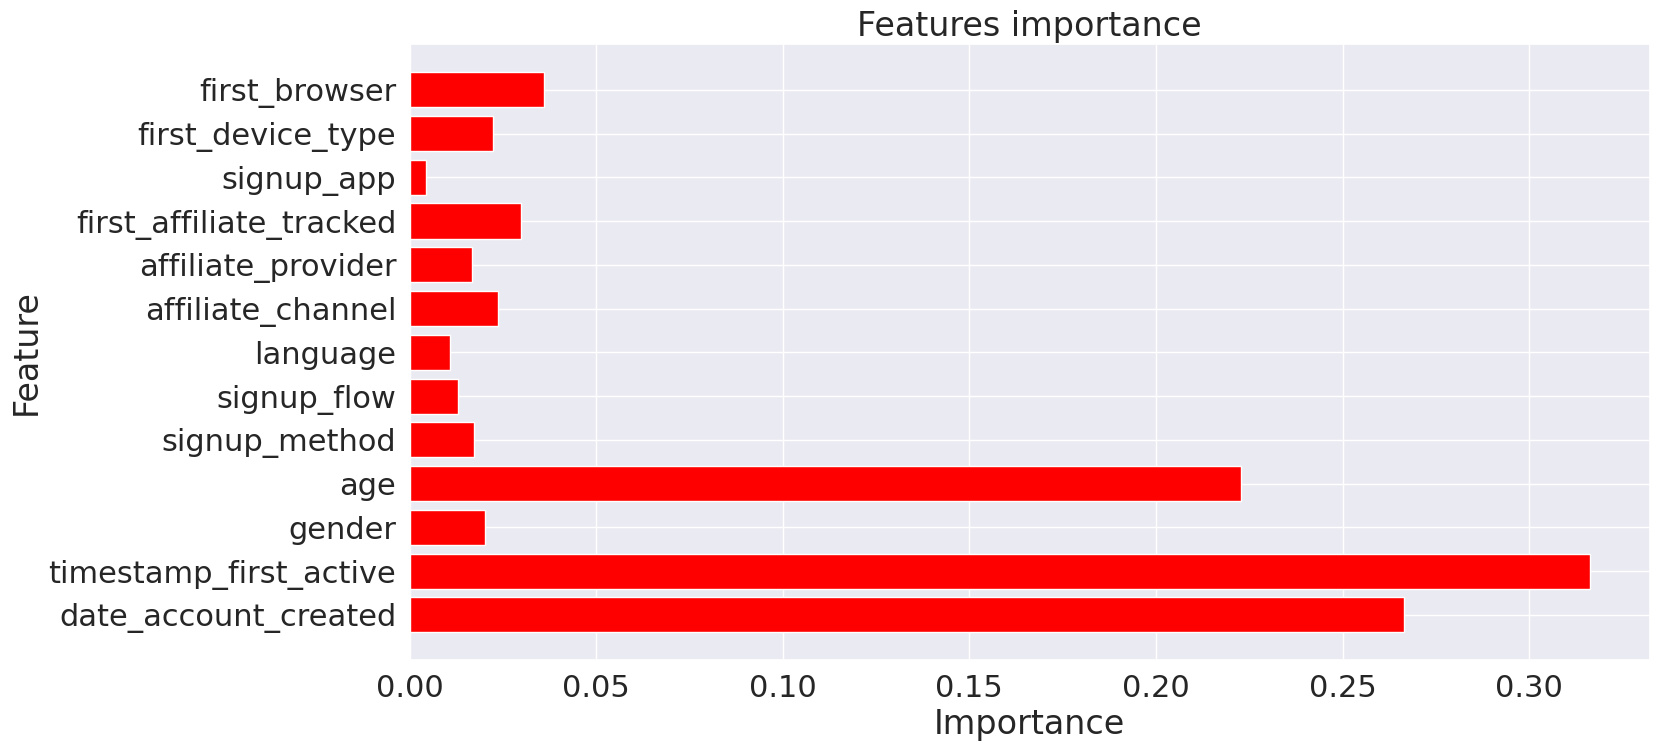

In [107]:


plt.figure(figsize=(16,8))
sns.set(font_scale=2)
ax=plt.subplot(111)
barplot=ax.barh(features_importance.index,features_importance['features_importance'],color="red")
plt.title("Features importance")
plt.ylabel("Feature")
plt.xlabel("Importance")